In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
import pandas as pd  
df = pd.read_csv('bank-full.csv',sep=';') 
df.shape

(45211, 17)

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [5]:
y=df['y']
x=df.iloc[:,:-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [6]:
le=LabelEncoder()
x['job']=le.fit_transform(x['job'])
x['marital']=le.fit_transform(x['marital'])
x['education']=le.fit_transform(x['education'])
x['default']=le.fit_transform(x['default'])
x['housing']=le.fit_transform(x['housing'])
x['loan']=le.fit_transform(x['loan'])
x['contact']=le.fit_transform(x['contact'])
x['month']=le.fit_transform(x['month'])
x['poutcome']=le.fit_transform(x['poutcome'])
y=le.fit_transform(y)
x,y

(       age  job  marital  education  default  balance  housing  loan  contact  \
 0       58    4        1          2        0     2143        1     0        2   
 1       44    9        2          1        0       29        1     0        2   
 2       33    2        1          1        0        2        1     1        2   
 3       47    1        1          3        0     1506        1     0        2   
 4       33   11        2          3        0        1        0     0        2   
 ...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
 45206   51    9        1          2        0      825        0     0        0   
 45207   71    5        0          0        0     1729        0     0        0   
 45208   72    5        1          1        0     5715        0     0        0   
 45209   57    1        1          1        0      668        0     0        1   
 45210   37    2        1          1        0     2971        0     0        0   
 
        day  m

In [10]:
lor=LogisticRegression(max_iter=50000)
lor.fit(x,y)
y_pred=lor.predict(x)
cm=confusion_matrix(y,y_pred)
true_negative=cm[0][0]
true_positive=cm[1][1]
false_negative=cm[1][0]
false_positive=cm[0][1]
def specificity(true_negative, false_positive):
    return (true_negative/(true_negative+false_positive))
print("Confusion Matrix is : ", confusion_matrix(y,y_pred).round(2))
print("Accuracy Score is : ", accuracy_score(y,y_pred).round(2))
print('Specificity is : ', specificity(true_negative, false_positive).round(2))
print("Recall Score is : ", recall_score(y,y_pred).round(2))
print("F1 Score is : ", f1_score(y,y_pred).round(2))
print("ROC Curve is : ", roc_curve(y,y_pred))
print('ROC Accuracy score is : ', roc_auc_score(y,y_pred).round(2))

Confusion Matrix is :  [[39156   766]
 [ 4213  1076]]
Accuracy Score is :  0.89
Specificity is :  0.98
Recall Score is :  0.2
F1 Score is :  0.3
ROC Curve is :  (array([0.        , 0.01918742, 1.        ]), array([0.       , 0.2034411, 1.       ]), array([2, 1, 0]))
ROC Accuracy score is :  0.59


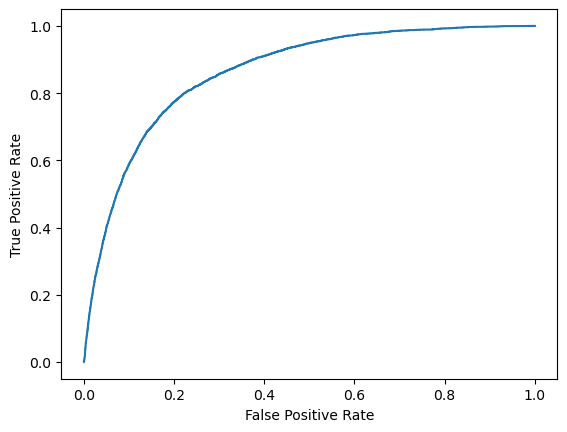

In [11]:
pred_prob=lor.predict_proba(x)[:,1]
pred_prob
len(pred_prob)

FPR,TPR,_=roc_curve(y, pred_prob)
import matplotlib.pyplot as plt
plt.plot(FPR,TPR)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate") 
plt.show()


In [12]:
y_pred1=pd.DataFrame(y_pred)
y_pred1.value_counts()

0    43369
1     1842
dtype: int64